# Geohackweek participant selection

In [15]:
%matplotlib inline
import os
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import entrofy
import entrofy.mappers
import entrofy.core

import six

seed = 20170615

In [16]:
# Get credentials
scope = ['https://spreadsheets.google.com/feeds']

credentials = ServiceAccountCredentials.from_json_keyfile_name('Geohackweek2017-adf8548865eb.json', scope)

gc = gspread.authorize(credentials)

In [17]:
# See available sheets
gc.openall()

[<Spreadsheet 'Event Registration (Responses)' id:1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo>]

In [18]:
sheets = gc.open_by_key('1mh5I8oIlVCtNB80nIcuwvTJsichHpaB2D_Os-iuCCEo')

In [19]:
ws = sheets.get_worksheet(0)

In [20]:
rec = ws.get_all_records()

In [21]:
df = pd.DataFrame.from_records(rec)

In [22]:
len(df)

91

In [23]:
df.columns

Index(['Do you have any specific project you intend to bring to Geo Hackweek?',
       'Do you have any specific topics you would like to learn about at Geo Hackweek?',
       'Do you have specific datasets that you would like to share at Geo Hackweek to work on with other groups? ',
       'Email Address', 'Experience with geospatial datasets',
       'Familiarity with command line interfaces', 'First Name',
       'Have you applied to Geo Hackweek before and not been selected for participation?',
       'Have you attended any hack day or hack week before?',
       'In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?',
       'Institution or Organization',
       'Is there a topic you could imagine teaching at Geo Hackweek?',
       'Last Name', 'Programming experience',
       'The main reas

In [24]:
new_cols = ['specific_project', 
            'specific_topics', 
            'specific_datasets', 
            'email', 
            'exp_geospatial', 
            'exp_cmd', 
            'first_name', 
            'apply_geohack',
            'apply_hack', 
            'gender_minor', 
            'ethnic_minor',
            'org_institute',
            'teach_topic',
            'last_name',
            'exp_prog',
            'reason_attend',
            'timestamp',
            'person_url',
            'location',
            'position',
            'science_work',
            'need_financial']

In [25]:
df.columns = new_cols

In [26]:
df = df.drop(['email', 'person_url', 'org_institute', 'first_name', 'last_name', 'reason_attend'], 
        axis=1)

In [27]:
df.replace('', 'na', regex=True, inplace=True)

In [28]:
fixed_categories = ['location', 
                    'position', 
                    'science_work', 
                    'exp_prog', 
                    'exp_geospatial', 
                    'exp_cmd', 
                    'apply_hack', 
                    'apply_geohack', 
                    'need_financial', 
                    'gender_minor', 
                    'ethnic_minor']

In [29]:
def make_plot(column_str):
    ax = entrofy.plotting.plot_distribution(df, column_str,
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation='vertical')

### What is your current geographical location?

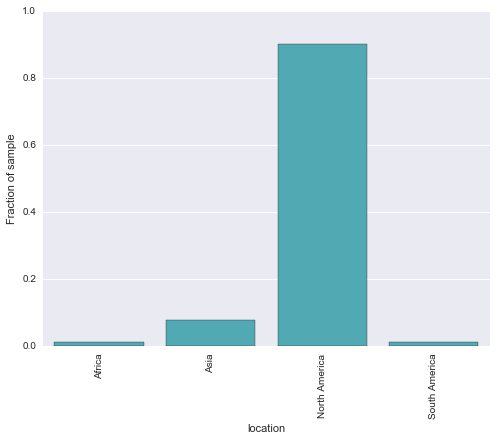

In [30]:
make_plot(fixed_categories[0])

### What is your current position?

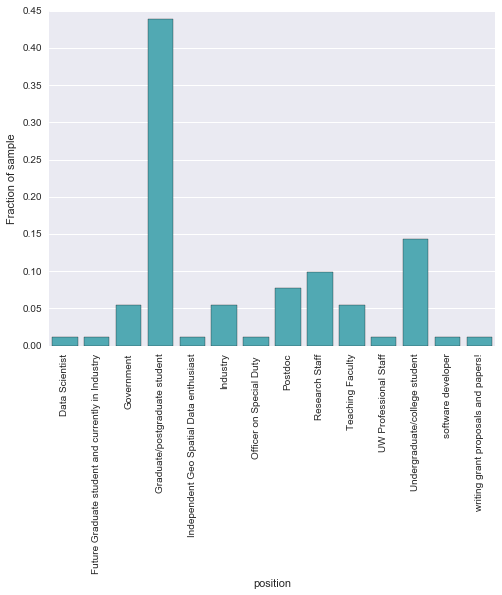

In [31]:
make_plot(fixed_categories[1])

### What is your primary science/work focus?

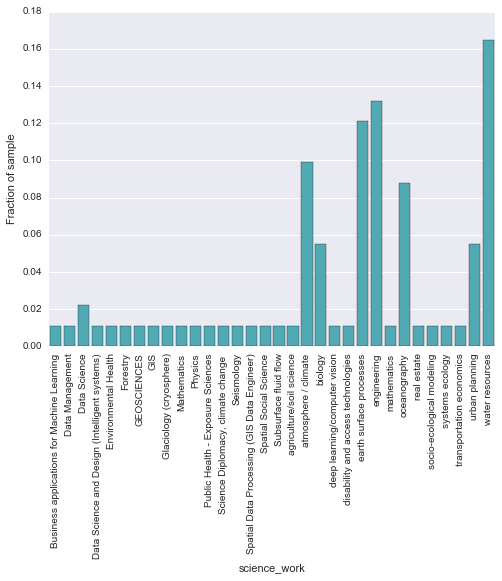

In [32]:
make_plot(fixed_categories[2])

### Programming experience

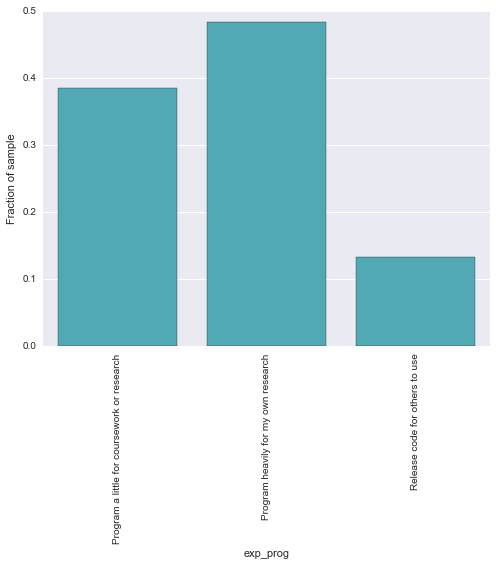

In [33]:
make_plot(fixed_categories[3])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

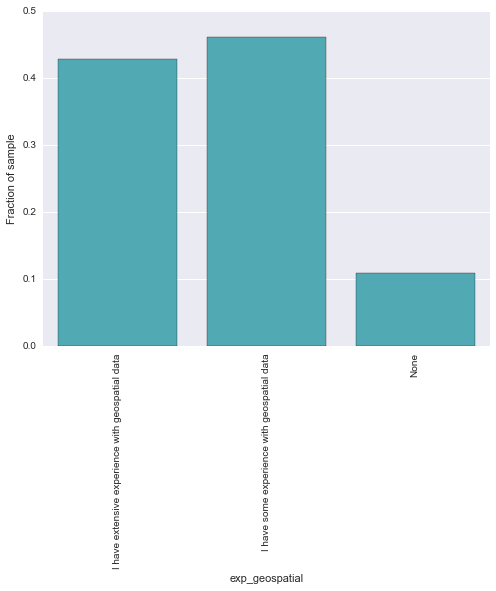

In [34]:
make_plot(fixed_categories[4])

### Familiarity with command line interfaces

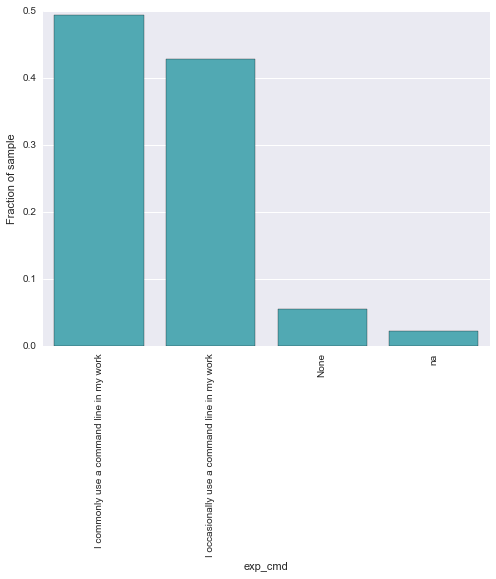

In [35]:
make_plot(fixed_categories[5])

### Have you attended any hack day or hack week before?

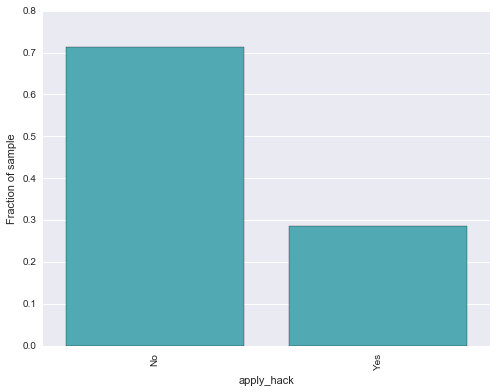

In [36]:
make_plot(fixed_categories[6])

### Have you applied to Geo Hackweek before and not been selected for participation?

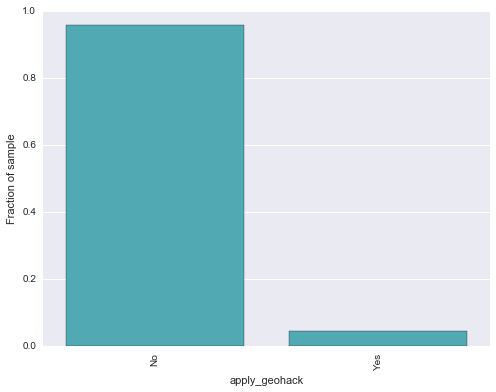

In [37]:
make_plot(fixed_categories[7])

### Will you be likely to need financial support from us to attend Geo Hackweek?

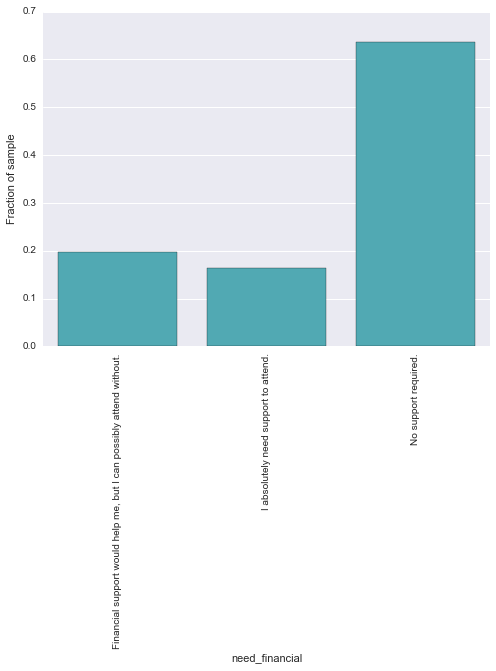

In [38]:
make_plot(fixed_categories[8])

### In terms of gender identity, do you consider yourself a minority with respect to the field of geospatial science?

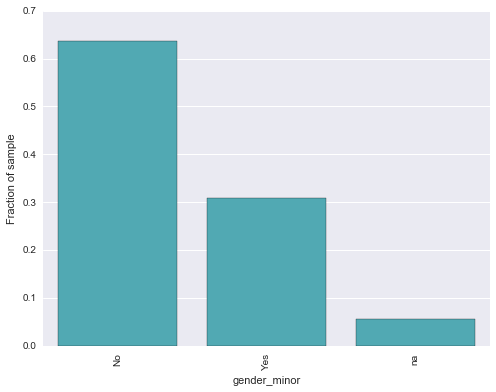

In [39]:
make_plot(fixed_categories[9])

### In terms of racial or ethnic identity, do you consider yourself a minority with respect to the field of geospatial science?

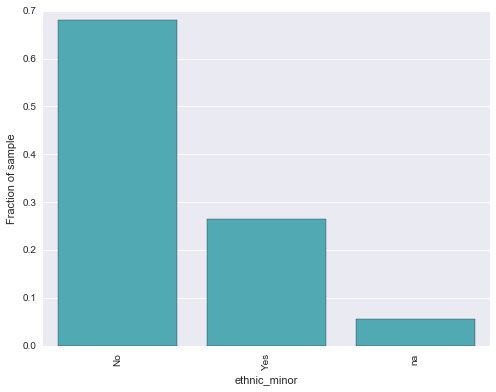

In [40]:
make_plot(fixed_categories[10])

In [41]:
weights = {'position': 1.0, 
           'exp_geospatial': 1.0, 
           'science_work': 1.0}

In [42]:
mappers = entrofy.core.construct_mappers(df, weights)

In [43]:
mappers

{'exp_geospatial': <entrofy.mappers.ObjectMapper at 0x1dc6e9bd4a8>,
 'position': <entrofy.mappers.ObjectMapper at 0x1dc6e9bdf98>,
 'science_work': <entrofy.mappers.ObjectMapper at 0x1dc6e9bdba8>}

In [44]:
datatypes = {'position': 'categorical',
             'exp_geospatial': 'categorical', 
             'science_work': 'categorical'}

In [45]:
mappers = entrofy.core.construct_mappers(df, weights, datatypes)

In [46]:
mappers['position'].targets

{'Data Scientist': 0.07142857142857142,
 'Future Graduate student and currently in Industry': 0.07142857142857142,
 'Government': 0.07142857142857142,
 'Graduate/postgraduate student': 0.07142857142857142,
 'Independent Geo Spatial Data enthusiast': 0.07142857142857142,
 'Industry': 0.07142857142857142,
 'Officer on Special Duty ': 0.07142857142857142,
 'Postdoc': 0.07142857142857142,
 'Research Staff': 0.07142857142857142,
 'Teaching Faculty': 0.07142857142857142,
 'UW Professional Staff': 0.07142857142857142,
 'Undergraduate/college student': 0.07142857142857142,
 'software developer': 0.07142857142857142,
 'writing grant proposals and papers!': 0.07142857142857142}

In [47]:
mappers['exp_geospatial'].targets

{'I have extensive experience with geospatial data': 0.3333333333333333,
 'I have some experience with geospatial data': 0.3333333333333333,
 'None': 0.3333333333333333}

In [48]:
mappers['science_work'].targets

{'Business applications for Machine Learning': 0.03125,
 'Data Management': 0.03125,
 'Data Science': 0.03125,
 'Data Science and Design (Intelligent systems)': 0.03125,
 'Environmental Health': 0.03125,
 'Forestry': 0.03125,
 'GEOSCIENCES': 0.03125,
 'GIS': 0.03125,
 'Glaciology (cryosphere)': 0.03125,
 'Mathematics': 0.03125,
 'Physics': 0.03125,
 'Public Health - Exposure Sciences': 0.03125,
 'Science Diplomacy, climate change ': 0.03125,
 'Seismology': 0.03125,
 'Spatial Data Processing (GIS Data Engineer)': 0.03125,
 'Spatial Social Science': 0.03125,
 'Subsurface fluid flow': 0.03125,
 'agriculture/soil science': 0.03125,
 'atmosphere / climate': 0.03125,
 'biology': 0.03125,
 'deep learning/computer vision': 0.03125,
 'disability and access technologies': 0.03125,
 'earth surface processes': 0.03125,
 'engineering': 0.03125,
 'mathematics': 0.03125,
 'oceanography': 0.03125,
 'real estate': 0.03125,
 'socio-ecological modeling': 0.03125,
 'systems ecology': 0.03125,
 'transporta

In [49]:
# # new targets in alphabetical order
# new_targets = [0.2, 0.5, 0.2, 0.1]

# # sort keys for the targets dictionary alphabetically:
# sorted_keys = np.sort(mappers["subfield"].targets.keys())

# for t, key in zip(new_targets, sorted_keys):
#     mappers["subfield"].targets[key] = t

In [50]:
idx, max_score = entrofy.core.entrofy(df, 20,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed)
print(max_score)

41.5275705996


In [51]:
#df.loc[idx]